# Python Solutions to Tutorial 04

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat 

#url = 'https://raw.githubusercontent.com/APS1040/Tutorials/main/Tutorial04_data.csv'
#df = pd.read_csv(url)


df = pd.read_csv('Tutorial04_data.csv')
df.head()


,Sample Number,Thickness,Wafer,Layer thickness
0,1,0.0629,1.0,11.0
1,1,0.0636,2.0,16.0
2,1,0.0640,3.0,22.0
3,2,0.0630,4.0,14.0
4,2,0.0631,5.0,34.0


## 1.	The thickness of a printed circuit board is an important quality parameter. Data on board thickness (in inches) are given in the dataset for 25 samples of three boards each.  Set up X-bar and S control charts. Is the process in statistical control?

S chart

In [69]:
m = 25 
s_accum = 0 
Ss = [] 
for n in range (1,m+1):        
    s = df.loc[df['Sample Number']==n,'Thickness'].std()
    s_accum = s_accum + s
    Ss.append(s)
CL_s = s_accum/m
print(CL_s)

UCL_s = 2.568 * CL_s 
LCL_s = 0
print(LCL_s, UCL_s)

0.00047817114987414434
0 0.0012279435128768027


In [70]:
for n in range(1,m+1):
    if Ss[n-1] >= UCL_s: 
         print(n, 'is out of bounds')

15 is out of bounds


Therefore, the process is out of control.

## 2.	After deleting the out-of-control points, what should be the upper and lower control limits for the S chart?

Take 15 out:

In [71]:
m = 25 
s_accum = 0 
Ss = [] 
for n in range (1,m+1):        
    s = df.loc[df['Sample Number']==n,'Thickness'].std()
    if n != 15:
        s_accum = s_accum + s
        Ss.append(s)
    else:
        Ss.append(np.nan)
        
CL_s = s_accum/(m-1)
print(CL_s)
UCL_s = 2.568 * CL_s 
LCL_s = 0
print(LCL_s, UCL_s)

0.000445997727414703
0 0.0011453221640009574


In [72]:
for n in range(1,m+1):
    if Ss[n-1] >= UCL_s: 
         print(n, 'is out of bounds')

No points out of control, so S chart is in control.

In [73]:
print(LCL_s, UCL_s)

0 0.0011453221640009574


## 3.	Based on the S chart obtained in the previous question, what is the estimate of the standard deviation for this process?

In [74]:
sigma=CL_s/0.8862
print(sigma)

0.0005032698345911792


## 4.	What are the upper and lower control limits for the in-control X-bar chart?

In [75]:
m = 25
x_bar_accum = 0
x_bars = []

for n in range (1,m+1):        
    x_bar = df.loc[df['Sample Number']==n,'Thickness'].mean()
    x_bars.append(x_bar)
    x_bar_accum = x_bar_accum+x_bar

CL_x_bar = x_bar_accum/m
print(CL_x_bar)

UCL_x_bar = CL_x_bar + 1.954 * CL_s 
LCL_x_bar = CL_x_bar - 1.954 * CL_s 

print(UCL_x_bar, LCL_x_bar)

0.062952
0.06382347955936832 0.06208052044063166


In [76]:
for n in range(1,m+1):
    if (x_bars[n-1] > UCL_x_bar or x_bars[n-1] < LCL_x_bar ): 
         print(n, 'is out of bounds')

14 is out of bounds
22 is out of bounds


Take out 14 and 22

In [77]:
x_bar_accum = 0
x_bars = []
for n in range (1,m+1):        
    x_bar = df.loc[df['Sample Number']==n,'Thickness'].mean()
    if (n!=14 and n!=22):
        x_bar_accum = x_bar_accum + x_bar
        x_bars.append(x_bar)
    else:
        x_bars.append(np.nan)
             
CL_x_bar = x_bar_accum/(m-2)
print(CL_x_bar)

UCL_x_bar = CL_x_bar + 1.954 * CL_s 
LCL_x_bar = CL_x_bar - 1.954 * CL_s 

print(UCL_x_bar, LCL_x_bar)

0.06295507246376811
0.06382655202313643 0.06208359290439978


In [78]:
for n in range(1,m+1):
    if (x_bars[n-1] > UCL_x_bar or x_bars[n-1] < LCL_x_bar ): 
         print(n, 'is out of bounds')

No points out of control now. Final values:

In [79]:
print(UCL_x_bar, LCL_x_bar)

0.06382655202313643 0.06208359290439978


# 5. What is the estimate of the mean for this process?

In [80]:
print("mean = ", CL_x_bar)

mean =  0.06295507246376811


## 6. The uniformity of a silicon wafer following an etching process is determined by measuring the layer thickness at several locations and expressing uniformity as the range of the thicknesses. The uniformity determinations for $30$ consecutive wafers processed through the etching tool are presented in the dataset. Is there evidence that uniformity is normally distributed?

Statistic: 1.158
Critical Values: [0.521 0.593 0.712 0.83  0.988]
Significance_level [15.  10.   5.   2.5  1. ]


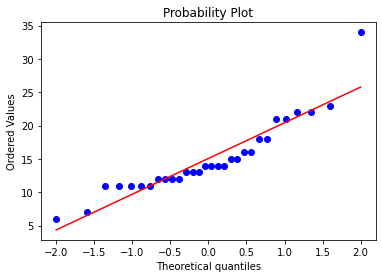

In [81]:
import scipy.stats as stat
data = df['Layer thickness'].dropna()
result=stat.anderson(data,'norm') #store results to improve output readability
print('Statistic: %.3f' % result.statistic)
print('Critical Values:',result.critical_values)
print('Significance_level', result.significance_level)
stat.probplot(data,plot=plt)
plt.show()

## 7. Take the natural logarithm of the data to make it normally distributed (check to see if that’s true!). Construct a control chart for individuals and a moving range control chart for uniformity for the etching process using the transformed data. Is the process in statistical control?

Statistic: 0.626
Critical Values: [0.521 0.593 0.712 0.83  0.988]
Significance_level [15.  10.   5.   2.5  1. ]


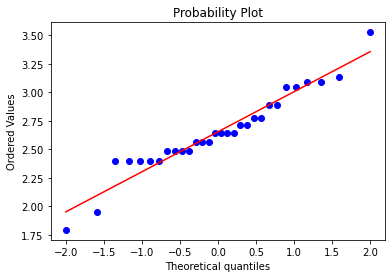

In [82]:
a=df['Layer thickness'].dropna()
ln_a=np.log(a)
import scipy.stats as stat
result=stat.anderson(ln_a,'norm') #store results to improve output readability
print('Statistic: %.3f' % result.statistic)
print('Critical Values:',result.critical_values)
print('Significance_level', result.significance_level)
stat.probplot(ln_a,plot=plt)
plt.show()

In [83]:
# now use I-MR
m=len(ln_a)
MR_samples = []
MR_acum=0
for i in range (0,m-1):
    MR = np.abs(ln_a[i+1]-ln_a[i])
    MR_samples.append(MR)
    MR_acum = MR_acum + MR

MR_bar=MR_acum/(m-1)
LCL=0
UCL=3.267*MR_bar
print(MR_bar,LCL,UCL)

0.3508855205640929 0 1.1463429956828914


In [84]:
for i in range (0,m-1):
    if(MR_samples[i]>=UCL):
        print(i+1,'out of control')

MR chart is in control

I-Chart now:

In [85]:
X_bar = ln_a.mean()

UCL=X_bar+2.660*MR_bar #E2
LCL=X_bar-2.660*MR_bar


print(LCL,X_bar,UCL)

1.719739710548112 2.653095195248599 3.586450679949086


In [88]:
for i in range(0,m):
    if (ln_a[i] > UCL) or (ln_a[i] < LCL):
        print(i+1,'out of control')
        


I-chart is in control

## 8. What is the value of MR-bar?

In [89]:
print("MR Bar =",MR_bar )

MR Bar = 0.3508855205640929


## 9. What is the estimate of the standard deviation for this process? (Consider the normally distributed data).

In [90]:
print(MR_bar/1.128) # MR/d2

0.3110687239043377


## 10. What are the upper and lower control limits for the I-chart? (Consider the normally distributed data).

In [91]:
print(X_bar,LCL,UCL)

2.653095195248599 1.719739710548112 3.586450679949086


## 11. What is the estimate of the mean for this process? (Consider the normally distributed data).

In [92]:
print(X_bar)

2.653095195248599


## 12. Suppose the process mean shifts to $2.7$. What is the probability of detecting this shift on the X chart on the first subsequent sample? 

In [93]:
n=1 # n is 1 when calculating beta for MR-I chart
Delta=2.7-X_bar
k=Delta/(MR_bar/1.128)
Beta=stat.norm.cdf(3-k*np.sqrt(n),0,1)-stat.norm.cdf(-3-k*np.sqrt(n),0,1)
print(Beta)
print(1-Beta)

0.9969944718041802
0.0030055281958197844


## 13. What is the average run length for the shift described in the previous question?

In [94]:
ARL=1/(1-Beta)
print(ARL)

332.7202191584302


## 14. For the shift described previously, what is the probability of detecting this transformation on the $4^{th}$ sample after its occurrence?

In [95]:
Pr=Beta**3*(1-Beta)
print(Pr)

0.0029785099636229976
